In [27]:
# Импорт необходимых библиотек

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
# Загружаем данные

data_ = pd.read_csv(r'D:\Netology\DSML\train.csv')

In [13]:
data_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В датасете 891 запись. 5 категориальных признаков. Есть отсутствующие значения в признаках "Age" (177), "Cabin" (687) и "Embarked" (2).
Столбец "PassengerId" неинформативен, можно удалить из рассмотрения.
Признак "Ticket" также не влияет на целевую переменную - можно удалить.
Признак "Name" содержит имя пассажира, вряд ли это как-то влияет на целевую переменную, удаляем его.
Признак "Cabin" содержит очень много пропусков, его также удаляем из рассмотрения.

In [19]:
# Формируем датасет для первой части задания (удаляем все пропущенные и категориальные переменные)

data_row = data_.copy()
data_row = data_row.dropna()[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data_row.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


In [20]:
data_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Age       183 non-null    float64
 3   SibSp     183 non-null    int64  
 4   Parch     183 non-null    int64  
 5   Fare      183 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 10.0 KB


In [24]:
#Разделяем на тренировочные и тестовые данные и обучаем модель на этих необработанных данных

X_train, X_test, y_train, y_test = train_test_split(data_row.drop(columns='Survived'), data_row['Survived'], test_size=0.20, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model_row = LogisticRegression()
model_row.fit(X_train, y_train)
model_row.score(X_test, y_test)

0.7027027027027027

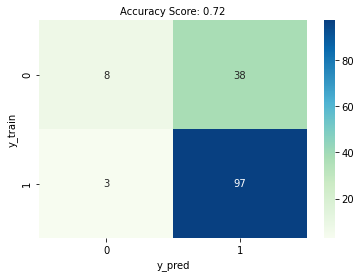

In [30]:
y_pred = model_row.predict(X_train)
acc = round(accuracy_score(y_train, y_pred), 2)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="GnBu")
plt.xlabel('y_pred')
plt.ylabel('y_train')
plt.title('Accuracy Score: {0}'.format(acc), size=10)
plt.show()

In [41]:
# Займемся обработкой данных. Формируем датасет

data_clear = data_.copy()

# Удаляем неинформативные признаки и признак "Cabin" с большим количеством пропусков

remove_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data_clear.drop(remove_cols, inplace=True, axis=1)

data_clear.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [42]:
# Заполним отсутствующие данные медианными значениями

data_clear['Age'] = data_clear['Age'].fillna(data_clear.groupby('Sex')['Age'].transform("median"))

In [47]:
# Преобразуем категориальный признак "Sex"

le = LabelEncoder()
data_clear['Sex'] = le.fit_transform(data_clear['Sex'])

data_clear.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [49]:
# Преобразуем категориальный признак "Embarked", удалив два пропущенных значения

data_clear = data_clear.dropna()[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data_clear['Embarked'] = le.fit_transform(data_clear['Embarked'])

data_clear.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [50]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.0 KB


In [51]:
# Проводим рассчет на очищенных данных

X_train, X_test, y_train, y_test = train_test_split(data_clear.drop(columns='Survived'), data_clear['Survived'], test_size=0.20, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model_clear = LogisticRegression()
model_clear.fit(X_train, y_train)
model_clear.score(X_test, y_test)

0.7808988764044944

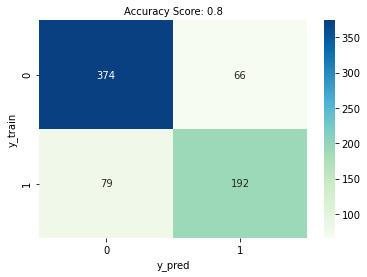

In [52]:
y_pred = model_clear.predict(X_train)
acc = round(accuracy_score(y_train, y_pred), 2)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="GnBu")
plt.xlabel('y_pred')
plt.ylabel('y_train')
plt.title('Accuracy Score: {0}'.format(acc), size=10)
plt.show()

В результате очистки данных удалось поднять точность модели на 8%. 